In [1]:
import LinearAlgebra
using Plots
using Random

using JuMP

import MathOptInterface
const MOI = MathOptInterface
using LaTeXStrings
using MosekTools

## Problem 9

In [2]:
A = [0 1 0 0 -1 0;
     0 0 1 0 0 -1]

c = [1; 1; 1; -1; -1; -1]

n, m = size(A)

(2, 6)

### solve the logistic regression problem using exponential cones

In [3]:
function logit_constraint(model, x) # define the constriant log(1+exp(-x) <= t)
    
    d = length(x)
    #println(d)
    @variable(model, t[1:d])
    @variable(model, y[1:d,1:2])
    
    for i in 1:d
        @constraint(model, [-t[i]; 1; y[i,1]] in MOI.ExponentialCone())
        @constraint(model, [-x[i]-t[i]; 1; y[i,2]] in MOI.ExponentialCone())
        @constraint(model, y[i,1] + y[i,2] <= 1)
    end   
    return t
end


lgr = Model(Mosek.Optimizer)
set_silent(lgr)
@variable(lgr, x[1:n])
@variable(lgr, x0)
t = logit_constraint(lgr, (A' * x .+ x0).*c )
@objective(lgr, Min, sum(t) + 0.001*x'*x)
optimize!(lgr)
println(value.(x), value(x0))

[5.245010299593032, 5.245010299602973]-5.595210961217845e-10


### solve the KKT using nonlinear equation solvers

In [4]:
# define the function and its gradient
function logit_fun(x)
    if x < 0
        return -1/(1+exp(x))
    else
        return -(1 - 1/(1+exp(-x)))
    end
end

logit_fun(0)


function logit_fun(x)
    
    return -1/(1+exp(x))
    
end



logit_fun (generic function with 1 method)

In [5]:
using NLsolve

function f!(F, x)
    temp = ([A; ones(1,m)]' * x).*c
    
    F[1] = x[1]*0.002 + sum( logit_fun.(temp).*c .* A[1,:] ) 
    F[2] = x[2]*0.002 + sum( logit_fun.(temp).*c .* A[2,:] ) 
    F[3] = sum( logit_fun.(temp).*c .* ones(m) )

end


nlsolve(f!, [0.1;0.1;0.1]) 

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.1, 0.1, 0.1]
 * Zero: [5.245185651705597, 5.245185651705597, -6.358051551142646e-17]
 * Inf-norm of residuals: 0.000000
 * Iterations: 10
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 11
 * Jacobian Calls (df/dx): 11

## Problem 10

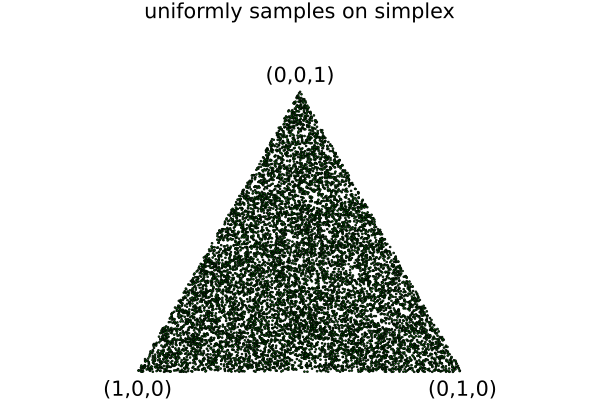

In [25]:
Random.seed!(222)
N = 10000
n = 3
X = diff([zeros(N) sort(rand(N,n-1), dims=2) ones(N)], dims=2) # sample uniformly from simplex

Tmat = [-1 1 0;
       0 0 sqrt(3)]' # transformation matrix
Y = X*Tmat # transform to 2d

xMin, xMax = -1.1, 1.1
yMin, yMax = -0.1, 2.1


scatter(Y[:,1], Y[:,2], markersize=1, color=:green, xlim=(xMin,xMax), ylim=(yMin, yMax), 
    axis=([], false), label="", aspect_ratio = 1)
annotate!([-1 1 0], [-0.1 -0.1 sqrt(3)+0.1], ["(1,0,0)", "(0,1,0)", "(0,0,1)"])
title!("uniformly samples on simplex")

In [26]:
## plot {x: phi_6(x,s) <= 0} for Problem 5 Part I

S = [1 1 0] .+ rand(N)*2

potential = minimum(6*log.(X*S') .- sum(log.(X.*S), dims=2), dims=2) 

flag0 = (potential .<= 0)[:]
#scatter(X[flag0,1], X[flag0,2], X[flag0,3], camera = (70,30), markersize=1, xlabel="x1", ylabel="x2", zlabel="x3")
Y = X[flag0,:]*Tmat

scatter(Y[:,1], Y[:,2], markersize=1, xlim=(xMin,xMax), ylim=(yMin, yMax), 
        axis=([], false), label="", aspect_ratio = 1, title=L"\{x: \phi_6(x,s) \leq 0\}")
annotate!([-1 1 0], [-0.1 -0.1 sqrt(3)+0.1], ["(1,0,0)", "(0,1,0)", "(0,0,1)"])
savefig("phi6-0-PartI.pdf")

In [27]:
## plot {x: phi_6(x,s) <= -10} for Problem 5 Part I

flag12 = (potential .<= -10)[:]
Y = X[flag12,:]*Tmat

scatter(Y[:,1], Y[:,2], markersize=1, xlim=(xMin,xMax), ylim=(yMin, yMax), 
    axis=([], false), label="", aspect_ratio = 1, title=L"\{x: \phi_6(x,s) \leq -10\}")
annotate!([-1 1 0], [-0.1 -0.1 sqrt(3)+0.1], ["(1,0,0)", "(0,1,0)", "(0,0,1)"])
savefig("phi6-n10-PartI.pdf")

In [28]:
## plot {x: phi_12(x,s) <= 0} for Problem 5 Part I

potential = minimum(12*log.(X*S') .- sum(log.(X.*S), dims=2), dims=2) 

flag0 = (potential .<= 0)[:]
Y = X[flag0,:]*Tmat

scatter(Y[:,1], Y[:,2], markersize=1, xlim=(xMin,xMax), ylim=(yMin, yMax), 
    axis=([], false), label="", aspect_ratio = 1, title=L"\{x: \phi_{12}(x,s) \leq 0\}")
annotate!([-1 1 0], [-0.1 -0.1 sqrt(3)+0.1], ["(1,0,0)", "(0,1,0)", "(0,0,1)"])
savefig("phi12-0-PartI.pdf")

In [29]:
## plot {x: phi_12(x,s) <= -10} for Problem 5 Part I

flag12 = (potential .<= -10)[:]
Y = X[flag12,:]*Tmat

scatter(Y[:,1], Y[:,2], markersize=1, xlim=(xMin,xMax), ylim=(yMin, yMax), 
    axis=([], false), label="", aspect_ratio = 1, title=L"\{x: \phi_{12}(x,s) \leq -10\}")
annotate!([-1 1 0], [-0.1 -0.1 sqrt(3)+0.1], ["(1,0,0)", "(0,1,0)", "(0,0,1)"])
savefig("phi12-n10-PartI.pdf")

In [30]:
## plot {x: phi_6(x,s) <= 0} for Problem 5 Part II

S = [1 0 0] .+ rand(N)*2

potential = minimum(6*log.(X*S') .- sum(log.(X.*S), dims=2), dims=2) 

flag0 = (potential .<= 0)[:]
#scatter(X[flag0,1], X[flag0,2], X[flag0,3], camera = (70,30), markersize=1, xlabel="x1", ylabel="x2", zlabel="x3")
Y = X[flag0,:]*Tmat

scatter(Y[:,1], Y[:,2], markersize=1, xlim=(xMin,xMax), ylim=(yMin, yMax), 
        axis=([], false), label="", aspect_ratio = 1, title=L"\{x: \phi_6(x,s) \leq 0\}")
annotate!([-1 1 0], [-0.1 -0.1 sqrt(3)+0.1], ["(1,0,0)", "(0,1,0)", "(0,0,1)"])
savefig("phi6-0-PartII.pdf")

In [31]:
## plot {x: phi_6(x,s) <= -10} for Problem 5 Part II

flag12 = (potential .<= -10)[:]
Y = X[flag12,:]*Tmat

scatter(Y[:,1], Y[:,2], markersize=1, xlim=(xMin,xMax), ylim=(yMin, yMax), 
    axis=([], false), label="", aspect_ratio = 1, title=L"\{x: \phi_6(x,s) \leq -10\}")
annotate!([-1 1 0], [-0.1 -0.1 sqrt(3)+0.1], ["(1,0,0)", "(0,1,0)", "(0,0,1)"])
savefig("phi6-n10-PartII.pdf")

In [32]:
## plot {x: phi_12(x,s) <= 0} for Problem 5 Part II

potential = minimum(12*log.(X*S') .- sum(log.(X.*S), dims=2), dims=2) 

flag0 = (potential .<= 0)[:]
Y = X[flag0,:]*Tmat

scatter(Y[:,1], Y[:,2], markersize=1, xlim=(xMin,xMax), ylim=(yMin, yMax), 
    axis=([], false), label="", aspect_ratio = 1, title=L"\{x: \phi_{12}(x,s) \leq 0\}")
annotate!([-1 1 0], [-0.1 -0.1 sqrt(3)+0.1], ["(1,0,0)", "(0,1,0)", "(0,0,1)"])
savefig("phi12-0-PartII.pdf")

In [34]:
## plot {x: phi_12(x,s) <= -10} for Problem 5 Part II

flag12 = (potential .<= -10)[:]
Y = X[flag12,:]*Tmat

scatter(Y[:,1], Y[:,2], markersize=1, xlim=(xMin,xMax), ylim=(yMin, yMax), 
    axis=([], false), label="", aspect_ratio = 1, title=L"\{x: \phi_{12}(x,s) \leq -10\}")
annotate!([-1 1 0], [-0.1 -0.1 sqrt(3)+0.1], ["(1,0,0)", "(0,1,0)", "(0,0,1)"])
savefig("phi12-n10-PartII.png")